In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading in the dataset
df = pd.read_csv('../data/result.csv')

In [3]:
# removing non-numerical ratings in the dataset
df = df[~df['RATING'].isin(['Opening', 'Temporarily', 'NEW', '-'])]
# converting the ratings into float datatype
df['RATING'] = df['RATING'].astype(float)

In [4]:
# converting the votes column into integers
df['VOTES'] = df['VOTES'].astype(int)

In [5]:
# fitering out the dataset based on the votes
# removing the restaurants consisting of low number of votes
vote_filter = df['VOTES'] >= df['VOTES'].median()
df_high_votes = df[vote_filter]

In [6]:
# fitering out the dataset based on the ratings
# removing the restaurants consisting of poor ratings
rating_filter = df_high_votes['RATING'] >= df_high_votes['RATING'].median()
df_high_ratings = df_high_votes[rating_filter]

In [7]:
# resetting the index of the new filtered dataset
df_high_ratings.reset_index(drop=True, inplace=True)
df_high_ratings = df_high_ratings.rename(columns={'Unnamed: 0': "Index"})

In [8]:
# obtaining the four quantile values of the price
quantile_values = [df_high_ratings['PRICE'].quantile(i/5) for i in range(1,5)]

# creating five categories based on the price
def categories(val):
    if val <= quantile_values[0]:
        return 1
    elif val <= quantile_values[1]:
        return 2
    elif val <= quantile_values[2]:
        return 3
    elif val <= quantile_values[3]:
        return 4
    else:
        return 5
    
df_high_ratings['PRICE_CATEGORIES'] = df_high_ratings['PRICE'].apply(categories)

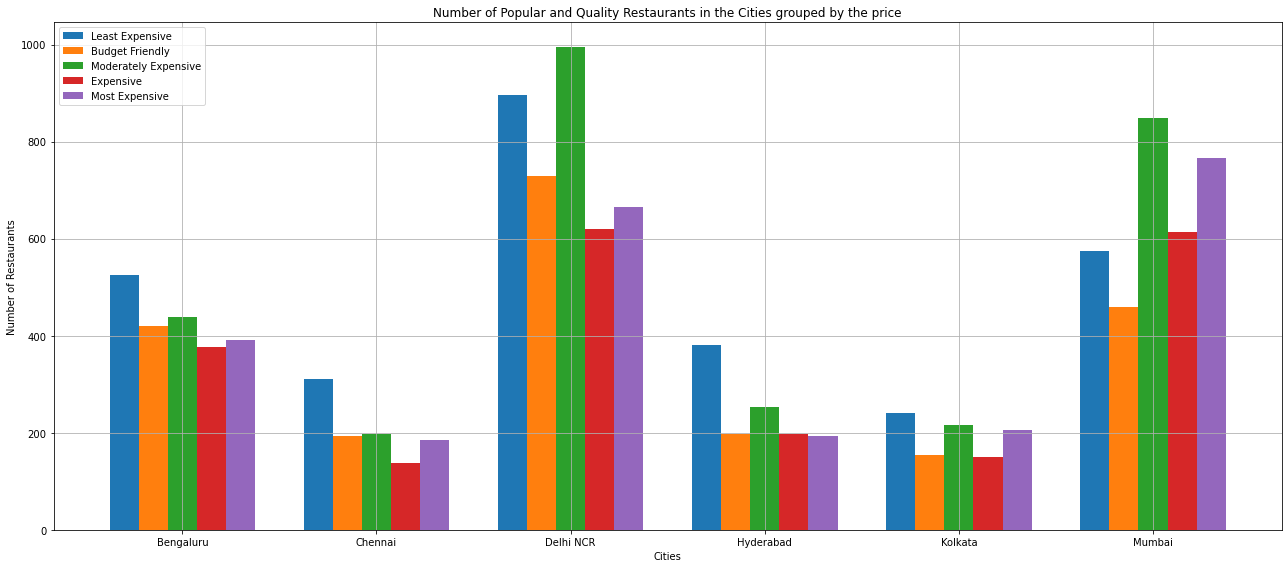

In [10]:
# creating a function to return the count of restaurants belonging to a certain price range
cities = sorted(df_high_ratings['CITY'].unique())
def restaurant_count(groupno):
    temp = df_high_ratings[df_high_ratings['PRICE_CATEGORIES'] == groupno]
    return list(temp['CITY'].value_counts()[cities])
    
# plotting graphs based on the price and the cities
x = np.arange(6)
plt.figure(figsize=(18,8))
plt.bar(x - .15 * 2, restaurant_count(1), .15, align='center')
plt.bar(x - .15 * 1, restaurant_count(2), .15)
plt.bar(x + .15 * 0, restaurant_count(3), .15)
plt.bar(x + .15 * 1, restaurant_count(4), .15)
plt.bar(x + .15 * 2, restaurant_count(5), .15)
plt.xticks(x, cities)
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.title('Number of Popular and Quality Restaurants in the Cities grouped by the price')
plt.legend(['Least Expensive', 'Budget Friendly', 'Moderately Expensive', 'Expensive', 'Most Expensive'], loc = 'upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
# filtering out the restaurants that have a poor review
rating_filter = df['RATING'] >= df['RATING'].median()
df_high_rating = df[rating_filter]

In [12]:
# filtering out the restaurants that do not have a lot of votes
vote_filter = df_high_rating['VOTES'] <= df_high_rating['VOTES'].median()
df_low_votes = df_high_rating[vote_filter]

In [13]:
# resetting the index of the dataset
df_low_votes.reset_index(drop=True, inplace=True)

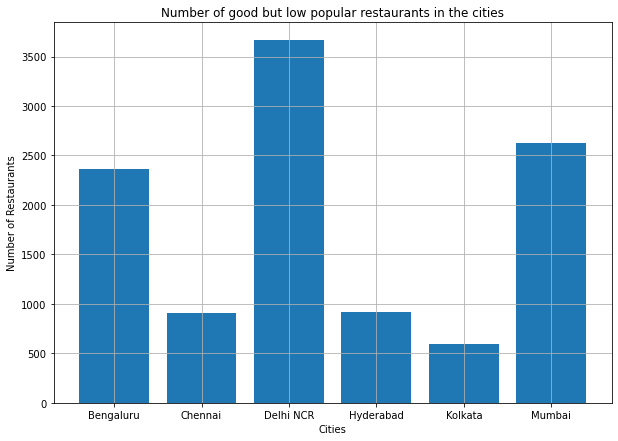

In [14]:
city_count = df_low_votes['CITY'].value_counts()[cities]
plt.figure(figsize=(10,7))
plt.title('Number of good but low popular restaurants in the cities')
plt.bar(x, city_count)
plt.xticks(x, cities)
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.grid()
plt.show()